In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

farm = pd.read_csv('framingham_train.csv')
farm_test = pd.read_csv('framingham_test.csv')

# farm.info()
farm.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0
3,1,37,College,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0
4,1,39,Some high school,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0


In [3]:
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                       data = farm).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.1139
Time:                        11:16:27   Log-Likelihood:                -968.00
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 3.382e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

## Part A
### i) 
The fitted logistic regression model is TenYearCHD = 1 / (1 + exp(-(-7.2609 + -0.0131*education[High school/GED] + -0.1185*education[Some college/vocational school] + 0.2273*education[Some high school] + 0.5732*male + 0.0552*age + 0.0144*currentSmoker + 0.0169*cigsPerDay + 0.0590*BPMeds + -0.0280*prevalentStroke + 0.3388*prevalentHyp + 0.4188*diabetes + 0.0009*totChol + 0.0180*sysBP + -0.0097*diaBP + 0.0106*BMI + -0.0068*heartRate + 0.0048*glucose)))

### ii) 
The most important rist factors for CHD risk identified by the model are male (sex), age, cigsPerDay, prevalentHyp, sysBP. These are the variables with p-value less than 0.05. If a patient is male, it multiplies the odds of log(TenYearCHD) by exp(0.5732) = 1.774. This means that a male is more likely to develop CHD than a female.

### iii) 
Find threshold value of p_bar (breakeven point): 500000(p/5) + 50000(1-p/5) = 450000p. Solve to get p = 5/36 = 0.139. The threshold of prescribe medication (high risk) and don't prescribe medication (low risk) is 5/36.

### iv) 
The model's accuracy on the test set is 0.623; this is the probability that the classifier correctly classifies a new observation as high or low risk. 

The True Positive Rate (TPR) is 0.683; this is the proportion of high risk people (who developed CHD) that we correctly identified as high risk (getting CHD).

The False Positive Rate (FPR) is 0.388; this is the proportion of people who are low risk (didn't developed CHD) that were incorrectly identified as high risk (developing CHD).


In [4]:
y_prob = logreg.predict(farm_test)
y_pred = pd.Series([1 if x > 5/36 else 0 for x in y_prob], index=y_prob.index)

from sklearn.metrics import confusion_matrix
y_test = farm_test['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[570 361]
 [ 53 114]]


In [4]:
accuracy = (570 + 114) / 1098 #sum(y_test == y_pred) / 2560
TPR = 114 / (53 + 114)
FPR = 361 / (570 + 361)
accuracy, TPR, FPR

(0.6229508196721312, 0.6826347305389222, 0.3877551020408163)

### v) 
Assuming that CHD outcomes aren't affected by the treatment decision, the economic cost per patient is $90,072.86. However, this assumption isn't reasonable since the treatment decision decreases the probability of developing CHD by 80\%, which would reduce the economic cost by a factor of 10. Thus the treatment decision has a big effect on the cost per patient.

Assuming that CHD outcomes are affected by the treatment decision, the economic cost per patient is $52695.81

In [5]:
#CHD outcomes ARE NOT affected by the treatment decision
total_cost = 114*500000 + 361*50000 + 53*450000 + 570*0
cost_per_patient = total_cost / 1098


#CHD outcomes ARE affected by the treatment decision
med_total_cost = 114*0.2*500000 + (361 + 114*.8)*50000 + 53*450000 + 570*0
med_cost_per_patient = med_total_cost / 1098

cost_per_patient, med_cost_per_patient

(90072.8597449909, 52695.81056466302)

### vi)
The baseline model predicts that none of the patients 1098 are at high risk. The accuracy of the baseline is 0.848; the TPR and FPR are both zero. The baseline expected economic cost per patient is $68,442.62. This is higher than the cost per patient from part (v) when assuming that CHD outcomes are affected by the treatment decision.

In [6]:
base_accuracy = (570 + 361) / 1098
base_TPR = 0 / (53 + 114)
base_FPR = 0 / (570 + 114)
base_total_cost = 450000*(53 + 114) + 0*(570 + 114)
base_cost_per_patient = base_total_cost / 1098

base_accuracy, base_TPR, base_FPR, base_cost_per_patient

(0.8479052823315119, 0.0, 0.0, 68442.62295081967)

### vii)
The probability that his patient will experience CHD in the next ten years is 0.212. Since this is greater than the threshold of 0.139, the physcian should prescribe the preventative medication for this patient.

In [7]:
pTenYearCHD = 1 / (1 + np.exp(-(-7.2609 + -0.0131*0 + -0.1185*0 + 0.2273*1 + 0.5732*1 + 0.0552*49 + 0.0144*1 + 0.0169*10 + 0.0590*0 + -0.0280*0 + 0.3388*1 + 0.4188*0 + 0.0009*197 + 0.0180*140 + -0.0097*100 + 0.0106*28 + -0.0068*62 + 0.0048*76)))
pTenYearCHD

0.2199255986982815

## Part B
The ROC curve for my logistic regression model is shown below. The ideal ROC curve has a high TRP and low FPR simultaneously, which this model's curve is close to. The area under the curve (AUC) is 0.73; this is the probability that our model would be able to distinguish between a randomly selected patient who is positive for CHD and a randomly selected patient who is negative for CHD. AUC is a unit-free measure of model quality that is used to evaluate the overall quality of a logistic regression model; the maximum is 1.

In [8]:
y_train = farm['TenYearCHD']
X_train = farm.drop(['TenYearCHD'], axis=1)

y_test = farm_test['TenYearCHD']
X_test = farm_test.drop(['TenYearCHD'], axis=1)

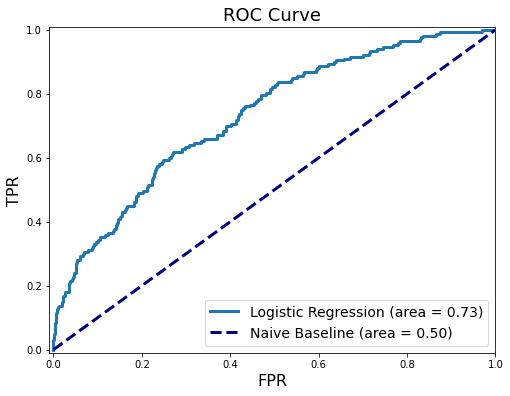

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

## Part C
Using the threshold value of p_bar = 5/36 from part (a), solve (c + 300,000)*(p/5) + c*(1-p/5) = 300,000*p + 0*(1-p) to get the optimal strategy for patients to 'self select'.
The insurance comapny should charge a co-payment of c = $33,333.33.

## Part D
Yes, the analysis of the co-payment raises ethical concerns because it forces low-income patients to forego the medication if they can't afford the co-payment, which is pretty expensive. Wealthier people will have greater access to the medication simply because they can afford it. One way to address this is to have doctors decide which patients get the medication based on their risk for CHD– use the classification model that we just built and give the medication to patients with the highest predicted risk.